Import Package

In [ ]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


Ignore Warning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Read Dataset

In [ ]:
df=pd.read_csv('/content/mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [ ]:
df['class'].unique()

array([1, 0])

In [ ]:
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,6
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
df['stem-height']=df['stem-height'].fillna(df['stem-height'].mode()[0])

In [ ]:
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
df.dtypes

,0
cap-diameter,int64
cap-shape,int64
gill-attachment,int64
gill-color,int64
stem-height,float64
stem-width,int64
stem-color,int64
season,float64
class,int64


Split into Features and Target

In [ ]:
X=df.iloc[:,:-1]
X

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


Data Visulization

<Axes: >

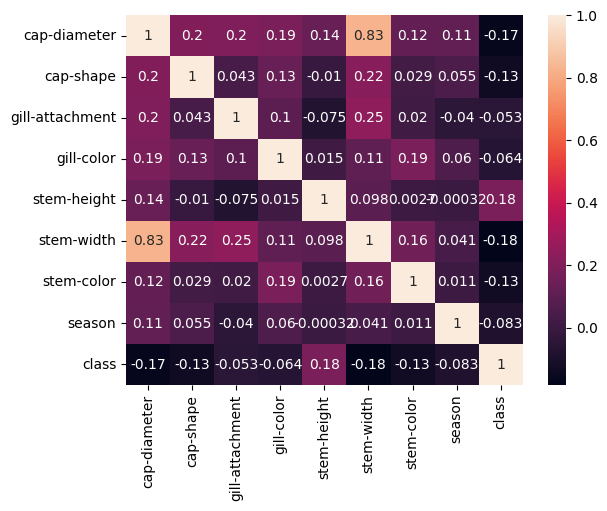

In [ ]:
sns.heatmap(df.corr(),annot=True)

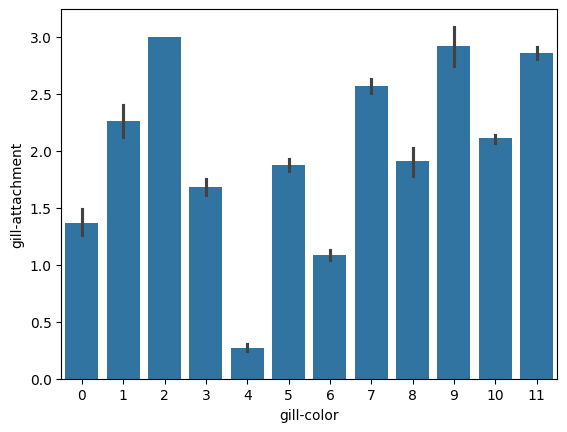

In [ ]:
sns.barplot(x='gill-color',y='gill-attachment',data=df)
plt.xlabel("gill-color")
plt.ylabel("gill-attachment")
plt.show()

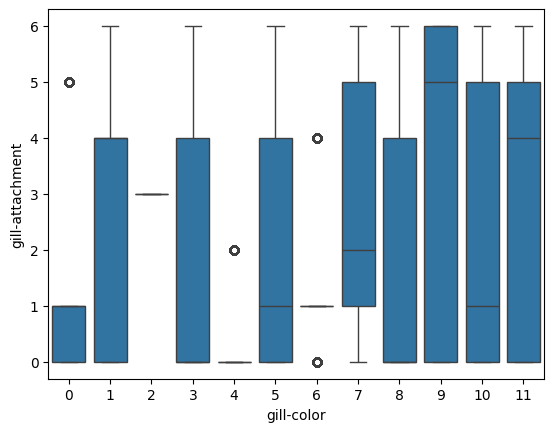

In [ ]:
sns.boxplot(x='gill-color',y='gill-attachment',data=df)
plt.xlabel("gill-color")
plt.ylabel("gill-attachment")
plt.show()

In [ ]:
y=df.iloc[:,-1]
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
54030,1
54031,1
54032,1
54033,1


Scaling Features

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.72554204, 0.33333333, 0.33333333, ..., 0.43289437, 0.91666667,
        1.        ],
       [0.77260709, 0.33333333, 0.33333333, ..., 0.43625665, 0.91666667,
        1.        ],
       [0.72501322, 0.33333333, 0.33333333, ..., 0.43877837, 0.91666667,
        1.        ],
       ...,
       [0.0433633 , 0.83333333, 0.5       , ..., 0.16363127, 1.        ,
        0.48459557],
       [0.04177684, 0.33333333, 0.5       , ..., 0.13757355, 1.        ,
        0.48459557],
       [0.03807509, 0.83333333, 0.5       , ..., 0.13785374, 1.        ,
        0.48459557]])

Split X and Y for traning and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((37824, 8), (37824,))

In [ ]:
X_test.shape,y_test.shape

((16211, 8), (16211,))

Model creation and test performance

*** KNeighborsClassifier(n_neighbors=9) ****
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7305
           1       0.99      0.99      0.99      8906

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

*** SVC(kernel='poly') ****
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7305
           1       0.77      0.82      0.79      8906

    accuracy                           0.76     16211
   macro avg       0.76      0.76      0.76     16211
weighted avg       0.76      0.76      0.76     16211

*** RandomForestClassifier() ****
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7305
           1       0.99      0.99      0.99      8906

    accuracy                           0.99     16211
   macro avg       0.

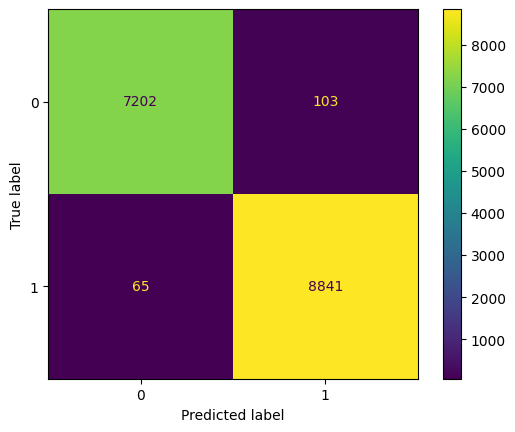

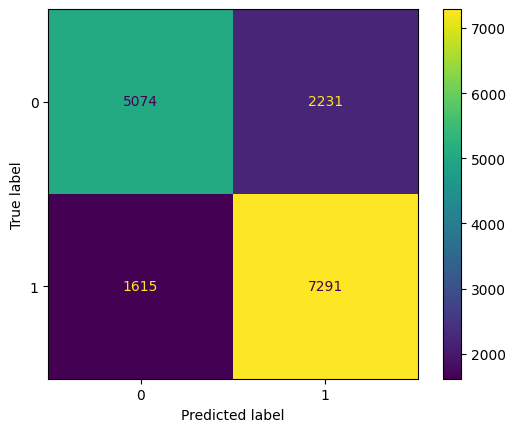

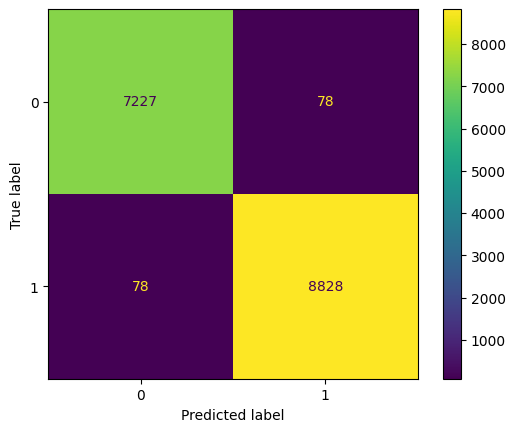

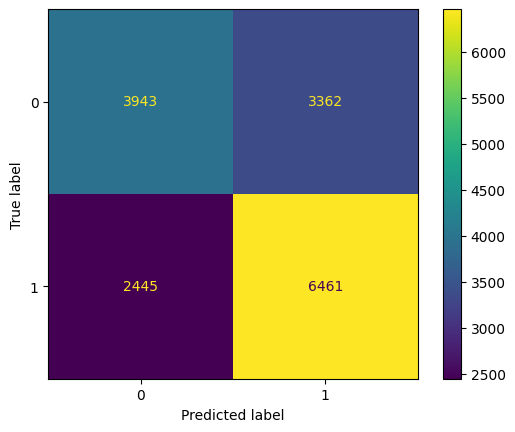

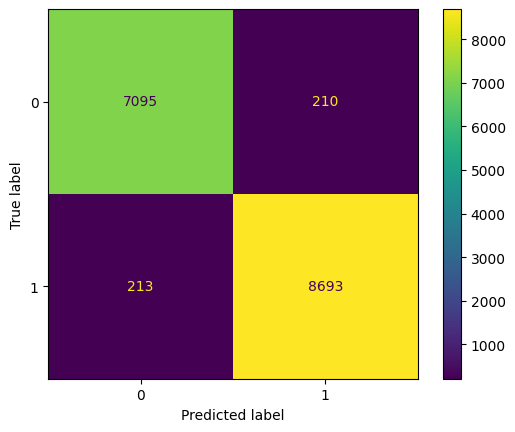

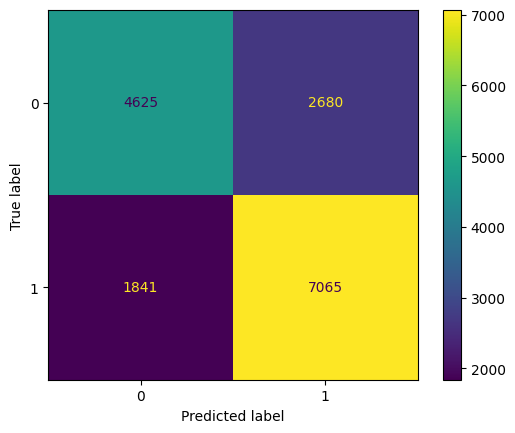

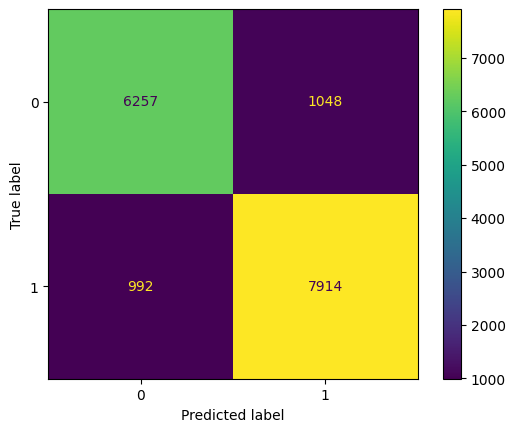

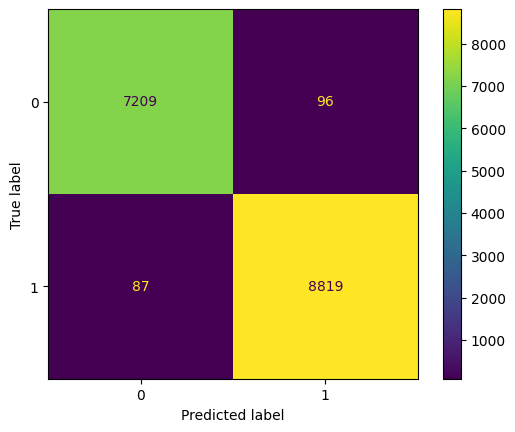

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
sv=SVC(kernel='poly')
gn=GaussianNB()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,sv,rf,gn,dt,ab,gb,xgb]
for model in models:
  print("***",model,"****")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
y_os.value_counts()

,count
class,
1,29675
0,29675


In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=5)
sv_os=SVC(kernel='poly')
gn_os=GaussianNB()
rf_os=RandomForestClassifier(random_state=1)
dt_os=DecisionTreeClassifier(random_state=1)
ab_os=AdaBoostClassifier()
gb_os=GradientBoostingClassifier()
xgb_os=XGBClassifier()
models=[knn_os,sv_os,rf_os,gn_os,dt_os,ab_os,gb_os,xgb_os]
for model in models:
  print("***",model,"****")
  model.fit(X_os_train,y_os_train)
  y_pred_os=model.predict(X_os_test)
  print(classification_report(y_os_test,y_pred_os))

*** KNeighborsClassifier() ****
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8854
           1       0.99      0.99      0.99      8951

    accuracy                           0.99     17805
   macro avg       0.99      0.99      0.99     17805
weighted avg       0.99      0.99      0.99     17805

*** SVC(kernel='poly') ****
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      8854
           1       0.75      0.78      0.77      8951

    accuracy                           0.76     17805
   macro avg       0.76      0.76      0.76     17805
weighted avg       0.76      0.76      0.76     17805

*** RandomForestClassifier(random_state=1) ****
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8854
           1       0.99      0.99      0.99      8951

    accuracy                           0.99     17805
   macro avg       0

In [ ]:
df.corr()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135627,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010327,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075295,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015183,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135627,-0.010327,-0.075295,0.015183,1.000000,0.098147,0.002743,-0.000318,0.183494
stem-width,0.828469,0.222494,0.245300,0.110283,0.098147,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002743,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000318,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183494,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
X=X.drop(['stem-height','season'],axis=1)

In [ ]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.72554204, 0.33333333, 0.33333333, 0.90909091, 0.43289437,
        0.91666667],
       [0.77260709, 0.33333333, 0.33333333, 0.90909091, 0.43625665,
        0.91666667],
       [0.72501322, 0.33333333, 0.33333333, 0.90909091, 0.43877837,
        0.91666667],
       ...,
       [0.0433633 , 0.83333333, 0.5       , 0.18181818, 0.16363127,
        1.        ],
       [0.04177684, 0.33333333, 0.5       , 0.18181818, 0.13757355,
        1.        ],
       [0.03807509, 0.83333333, 0.5       , 0.18181818, 0.13785374,
        1.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

*** KNeighborsClassifier(n_neighbors=9) ****
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7305
           1       0.98      0.98      0.98      8906

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211

*** SVC(kernel='poly') ****
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      7305
           1       0.71      0.79      0.75      8906

    accuracy                           0.71     16211
   macro avg       0.71      0.70      0.70     16211
weighted avg       0.71      0.71      0.70     16211

*** RandomForestClassifier() ****
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7305
           1       0.98      0.98      0.98      8906

    accuracy                           0.98     16211
   macro avg       0.

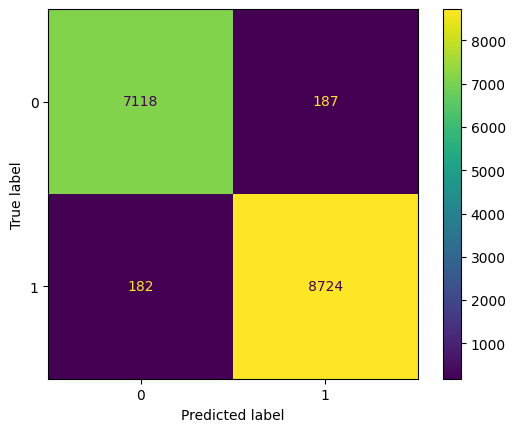

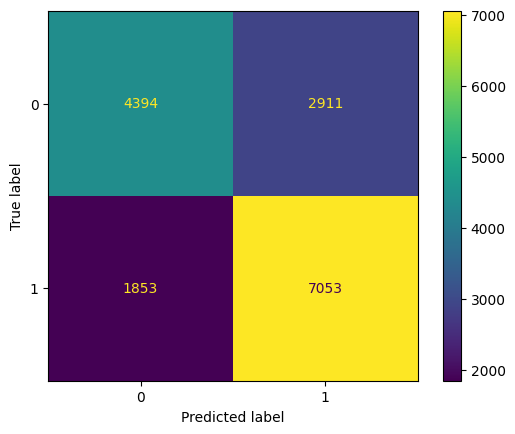

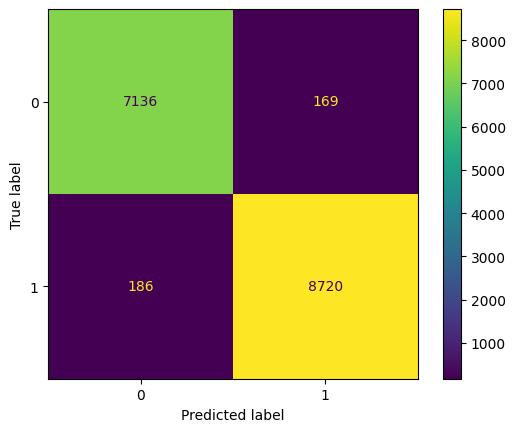

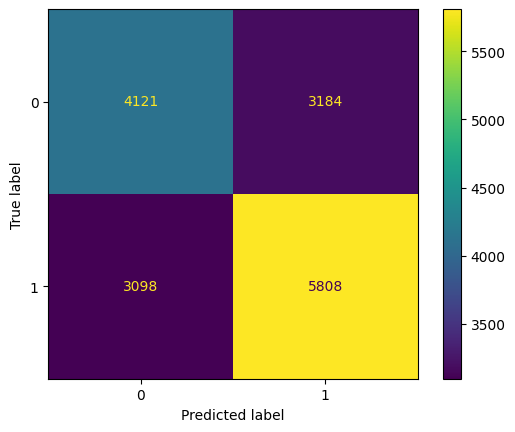

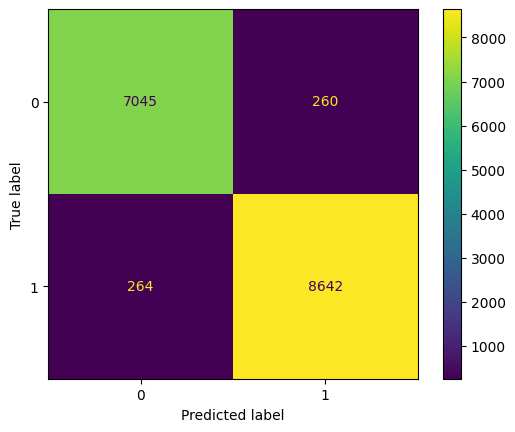

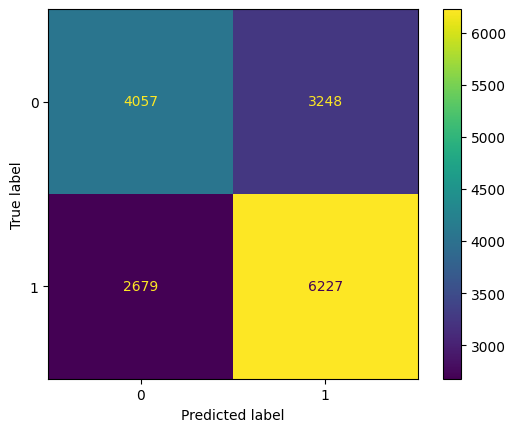

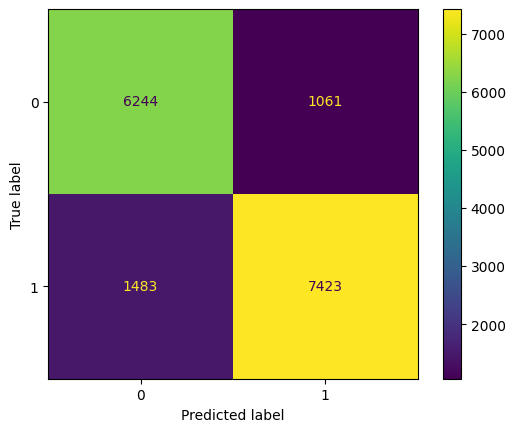

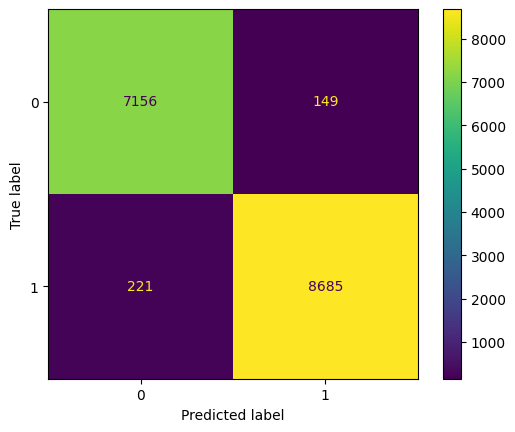

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
sv=SVC(kernel='poly')
gn=GaussianNB()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,sv,rf,gn,dt,ab,gb,xgb]
for model in models:
  print("***",model,"****")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
params={'weights':['uniform','distance'],'n_neighbors':[3,5,7,9],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [ ]:
clf=GridSearchCV(knn_os,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
knn1=KNeighborsClassifier()
knn1.fit(X_os_train,y_os_train)
y_pred_os=knn1.predict(X_os_test)
print(classification_report(y_os_test,y_pred_os))

ROC Curve

In [ ]:
RocCurveDisplay.from_estimator(knn1,X_os_test,y_os_test)
plt.title('ROC Curve')
plt.show()

Dump the best model

In [ ]:
X=df.iloc[:,:-1]
X

In [ ]:
scaler1=MinMaxScaler()
X_scaled=scaler1.fit_transform(X)
X_scaled

In [ ]:
pickle.dump(knn1,open('knn1model.sav','wb'))

In [ ]:
pickle.dump(scaler1,open('scaler1.sav','wb'))

In [ ]:
y_new=knn1.predict(scaler1.transform([[1372,2,2,10,3.807467,1545,11,1.804273]]))
y_new.item()